In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import pandas as pd
from wordcloud import WordCloud

df= pd.read_excel('/Users/Owner/OneDrive/Desktop/Coin.xlsx')
df

,Ticker Symbol,Entity Name,CUSIP,ISIN,Unique ID,As Of Date,URL,Rating,Review,Title,...,App,App Link,Date Added,Date Updated,Sector,Industry,GICS Sector,GICS Industry,ICB Industry,ICB Sector
0,nasdaq:coin,886427730,NaN,NaN,2062943,20211101,https://apps.apple.com/us/app/slug/id886427730...,1,I never write reviews... My id verify has beg ...,ID VERIFY?!,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T223109Z,20211102T223109Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
1,nasdaq:coin,886427730,NaN,NaN,2062934,20211101,https://apps.apple.com/us/app/slug/id886427730...,1,Can’t even verify my identity to open an accou...,Terrible customer service,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T223109Z,20211102T223109Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
2,nasdaq:coin,886427730,NaN,NaN,2047139,20211101,https://apps.apple.com/us/app/slug/id886427730...,5,I’m new to te\nHe crypto game but this app off...,Great app!,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T221857Z,20211102T221857Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
3,nasdaq:coin,886427730,NaN,NaN,2043413,20211101,https://apps.apple.com/us/app/slug/id886427730...,1,I’ve submitted so many request just for each o...,Worst Customer Service Ever,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T221615Z,20211102T221615Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
4,nasdaq:coin,886427730,NaN,NaN,2045841,20211101,https://apps.apple.com/us/app/slug/id886427730...,5,So much helpful information! Taught me a lot i...,Best Investing App!,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T221810Z,20211102T221810Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27773,nasdaq:coin,886427730,NaN,NaN,2061036,20140620,https://apps.apple.com/us/app/slug/id886427730...,2,"can't buy or sell bitcoin, what's the point.",coinbase lite?,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T222946Z,20211102T222946Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
27774,nasdaq:coin,886427730,NaN,NaN,2057059,20140620,https://apps.apple.com/us/app/slug/id886427730...,5,This is what I've been waiting for. I was ser...,Thank GOD! Now I don't have to go to Andriod!,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T222634Z,20211102T222634Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
27775,nasdaq:coin,886427730,NaN,NaN,2059174,20140620,https://apps.apple.com/us/app/slug/id886427730...,5,"Send, receive, scan QR codes and monitor your ...",Awesome!,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T222811Z,20211102T222811Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN
27776,nasdaq:coin,886427730,NaN,NaN,2060069,20140620,https://apps.apple.com/us/app/slug/id886427730...,1,This is not made by Coinbase. If you used th...,WARNING FAKE,...,"Coinbase: Trade BTC, ETH, SHIB",https://apps.apple.com/us/app/slug/id886427730,20211102T222858Z,20211102T222858Z,Technology,General Financial,Financial,Capital Markets,Technology,NaN


(array([10521.,  2003.,  2308.,  2410., 10536.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

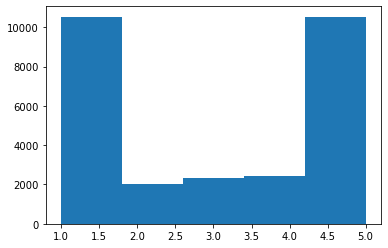

In [2]:
#rating distribution
rating=df['Rating']
plt.hist(rating, bins=5)

In [3]:
df.groupby('Rating')['URL'].count()

Rating
1    10521
2     2003
3     2308
4     2410
5    10536
Name: URL, dtype: int64

In [4]:
#average rating
mean=rating.mean()
mean

3.0157318741450068

Text(0.5, 1.0, 'Overall Reviews')

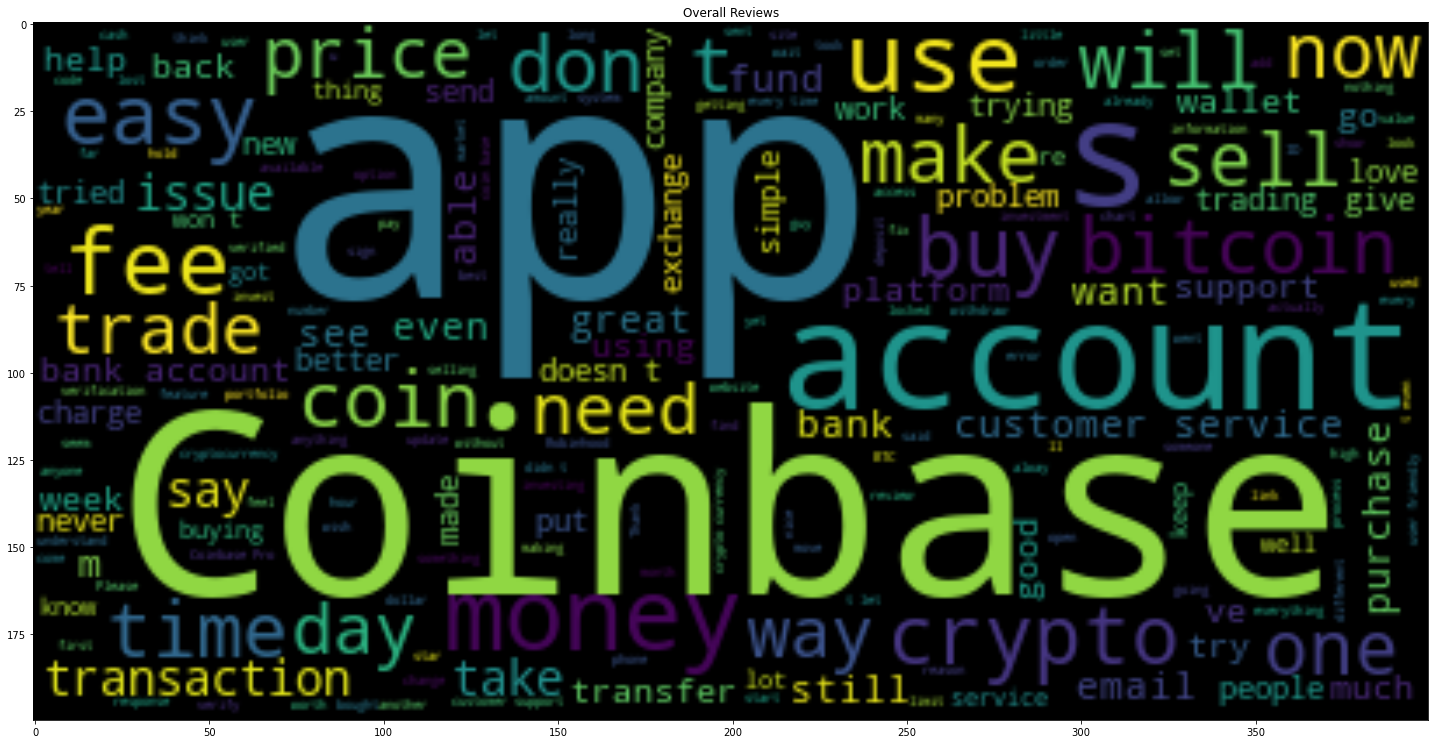

In [46]:
#wordcloud of all reviews
a=list(df['Review'])

aa=''

text_reviews = aa.join(a)
coinbase_reviews=WordCloud().generate(text_reviews)

plt.figure(figsize=(25,20))
plt.imshow(coinbase_reviews, interpolation='bilinear')
plt.title('Overall Reviews')

In [6]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else -1)
df['sentiment'].mean() #review sentiments score

<ipython-input-6-072811ca8dfb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.0165685119748724

Text(0.5, 1.0, 'Positive Reviews')

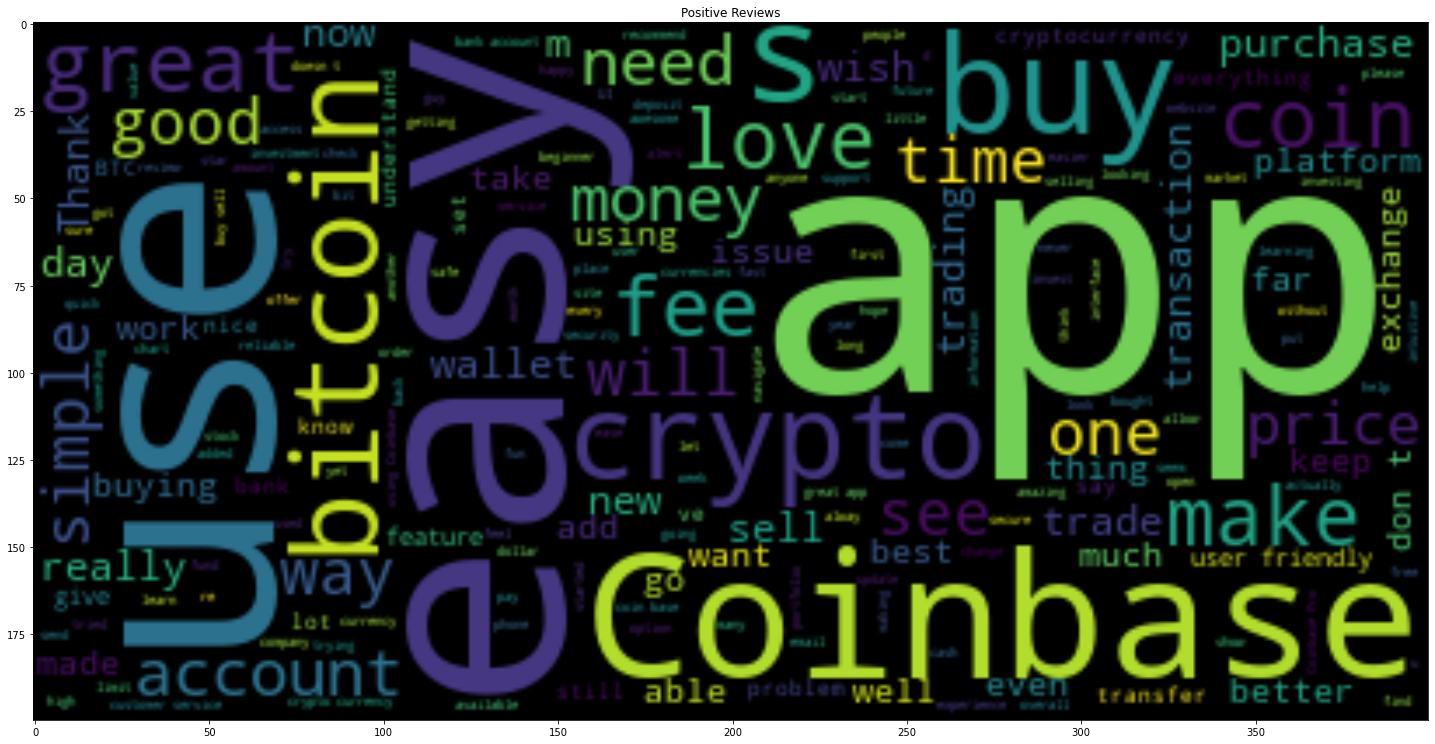

In [45]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

positive_reviews=positive['Review']
negative_reviews=negative['Review']

#positive review wordcloud
p=list(positive['Review'])

pp=''

pos = pp.join(p)
pos_reviews=WordCloud().generate(pos)

plt.figure(figsize=(25,20))
plt.imshow(pos_reviews, interpolation='bilinear')
plt.title('Positive Reviews')

Text(0.5, 1.0, 'Negative Reviews')

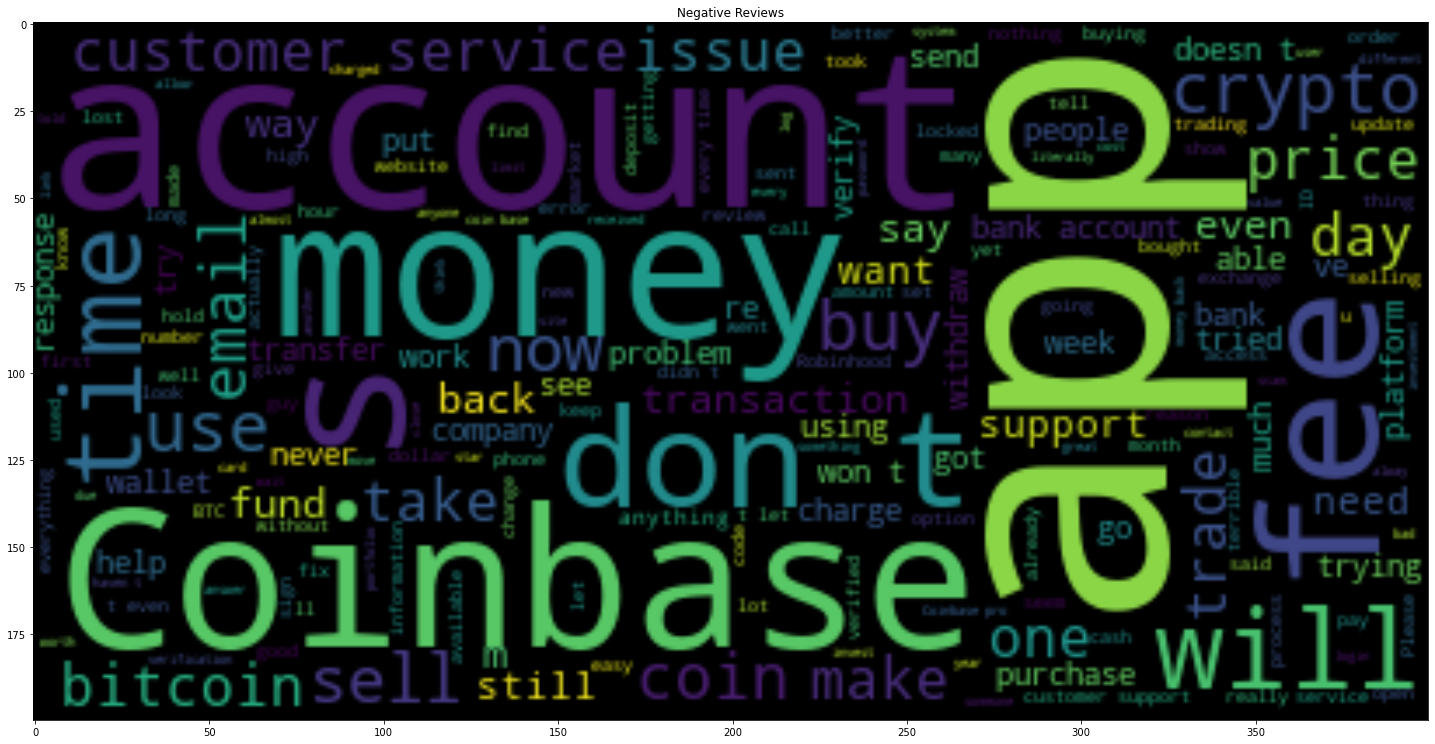

In [44]:
#negative review wordcloud
n=list(negative['Review'])

nn=''

neg = nn.join(n)
neg_reviews=WordCloud().generate(neg)

plt.figure(figsize=(25,20))
plt.imshow(neg_reviews, interpolation='bilinear')
plt.title('Negative Reviews')

(array([12523.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12946.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

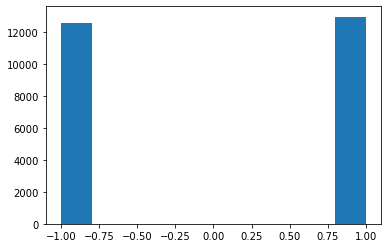

In [43]:
#distribution of sentiment
sentiment_ratings=df['sentiment']

fig=plt.hist(sentiment_ratings)
fig

In [10]:
#review sentiment
sentiment_ratings.mean()

0.0165685119748724

In [11]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Review'] = df['Review'].apply(remove_punctuation)
df = df.dropna(subset=['Title'])
df['Title'] = df['Title'].apply(remove_punctuation)
df['Title']

<ipython-input-11-6c70fdbfcf4a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                                          ID VERIFY
1                          Terrible customer service
2                                          Great app
3                        Worst Customer Service Ever
4                                 Best Investing App
                            ...                     
27773                                  coinbase lite
27774    Thank GOD Now I don't have to go to Andriod
27775                                        Awesome
27776                                   WARNING FAKE
27777                     Setup basically impossible
Name: Title, Length: 25469, dtype: object

In [12]:
dfNew = df[['Title','sentiment']]
dfNew.head()

,Title,sentiment
0,ID VERIFY,-1
1,Terrible customer service,-1
2,Great app,1
3,Worst Customer Service Ever,-1
4,Best Investing App,1


In [13]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

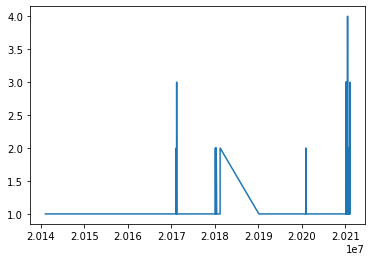

In [57]:
#keyword searcher for words over time
def keyword(x):
    review=df[df['Review'].str.contains(x)]
    review=review.groupby('As Of Date')['URL'].count()
    dates=review.index
    return plt.plot(dates, review)

keyword('worst')

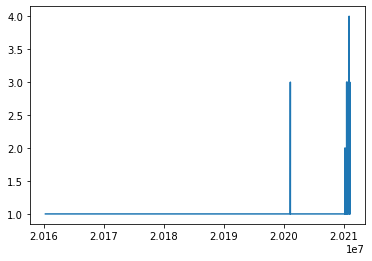

In [68]:
keyword('stole')

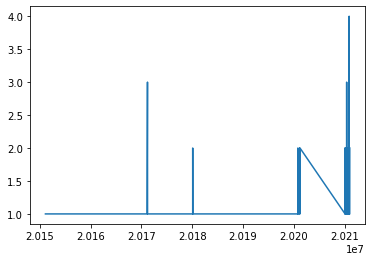

In [79]:
keyword('horrible')

In [80]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Title'])
test_matrix = vectorizer.transform(test['Title'])

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [34]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [32]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[2205,  395],
       [ 432, 2224]], dtype=int64)

In [33]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.84      0.85      0.84      2600
           1       0.85      0.84      0.84      2656

    accuracy                           0.84      5256
   macro avg       0.84      0.84      0.84      5256
weighted avg       0.84      0.84      0.84      5256

